#  Heat Maps

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d function. 

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


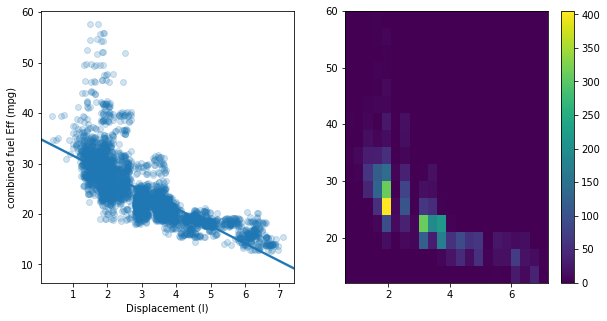

In [6]:
plt.figure(figsize=[10,5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1,2,1)
sb.regplot(data=df, x='displ', y='comb' ,fit_reg=True, x_jitter=.2, y_jitter=.2, scatter_kws={'alpha':1/5})
plt.xlabel('Displacement (l)')
plt.ylabel('combined fuel Eff (mpg)')

plt.subplot(1,2,2)
bin_x=np.arange(.6, 7+.3,.3)
bin_y=np.arange(12, 58+3,3)
plt.hist2d(data=df, x='displ', y='comb',bins=[bin_x,bin_y] )
plt.colorbar()

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram. We add a **colorbar** function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

In [5]:
df[[ 'displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.


# Additional Variations

To select a different color palette, you can set the **cmap** parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on [this part](https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib) of the Pyplot API documentation. I will  show an example of reversing the default "viridis" color palette, by setting **cmap = 'viridis_r'.**

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The **"cmin"** parameter specifies the minimum value in a cell before it will be plotted. By adding a **cmin = 0.5** parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

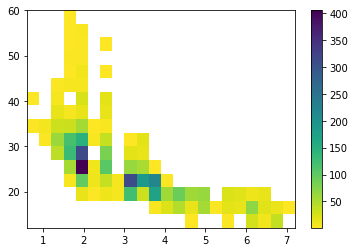

In [7]:
bin_x=np.arange(.6, 7+.3,.3)
bin_y=np.arange(12, 58+3,3)
plt.hist2d(data=df, x='displ', y='comb',bins=[bin_x,bin_y], cmin=.5 ,cmap='viridis_r' )
plt.colorbar()

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

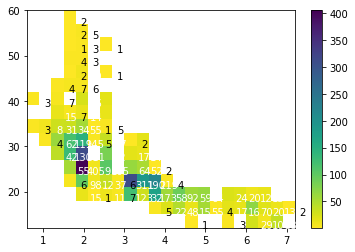

In [18]:
bin_x=np.arange(.6, 7+.3,.3)
bin_y=np.arange(12, 58+3,3)
h2d=plt.hist2d(data=df, x='displ', y='comb',bins=[bin_x,bin_y], cmin=.5 ,cmap='viridis_r' )
plt.colorbar()

counts=h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c=counts[i,j]
        
        if c>7:
            plt.text(bin_x[i]+0.5 ,bin_y[j]+0.5 , int(c), ha = 'center', va = 'center', color = 'white')
        
        elif c>0:      
            plt.text(bin_x[i]+0.5 ,bin_y[j]+0.5 , int(c), ha = 'center', va = 'center', color = 'black')


If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap function for just that, as will be seen later.